### Data Science Internship Task 1: Exploratory Data Analysis of given datasets.

Name: Rushikesh Borade <br>
Gmail: rishipb19@gmail.com <br>
Contact: 7038235686 <br>

In [2]:
import pandas as pd
import numpy as np

# Load datasets
customers = pd.read_csv('datasets/Customers.csv')
products = pd.read_csv('datasets/Products.csv')
transactions = pd.read_csv('datasets/Transactions.csv')

In [6]:
# Display Information on each dataset
customers.info

<bound method DataFrame.info of     CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]>

In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [8]:
# Check for Missing Values
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [9]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [10]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [14]:
# Check duplicated
print(f"Duplicated Values in customers: {customers.duplicated().sum()}")
print(f"Duplicated Values in Products: {products.duplicated().sum()}")
print(f"Duplicated Values in Transactions: {transactions.duplicated().sum()}")


Duplicated Values in customers: 0
Duplicated Values in Products: 0
Duplicated Values in Transactions: 0


In [17]:
# Merge Datasets based on Customer ID and ProductID
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


Now, we will dive into the following insights:

1. Customer region based demographics
2. Product Performance
3. Total Sales over time
4. Seasonal Trends if any
5. Identification fo high value Customers

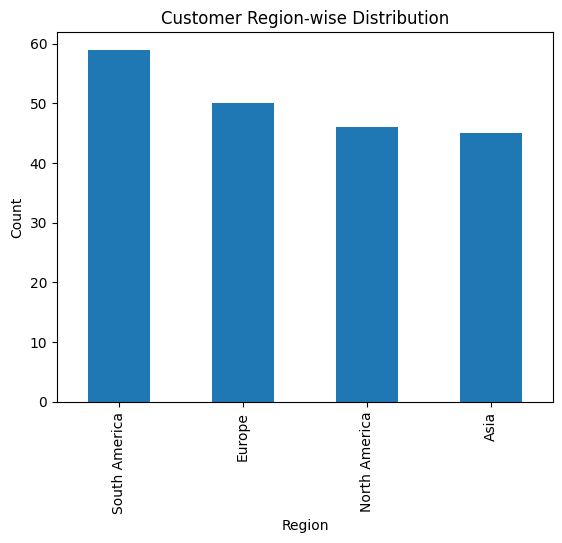

In [19]:
# Customer region based demographics
import matplotlib.pyplot as plt
regions = customers["Region"].value_counts()
regions.plot(kind="bar", title="Customer Region-wise Distribution", xlabel="Region", ylabel="Count")
plt.show()

### Region-wise Distribution of Customers

1. South America stands out as the region with the highest number of customers, clearly leading over other regions.
2. While Europe, North America, and Asia also have comparable customer distributions, they fall behind South America.
3. The high customer density in South America presents a valuable opportunity for targeted marketing and business expansion strategies.
4. At the same time, efforts can be focused on growing customer bases in other regions to balance the distribution and capture untapped market potential.

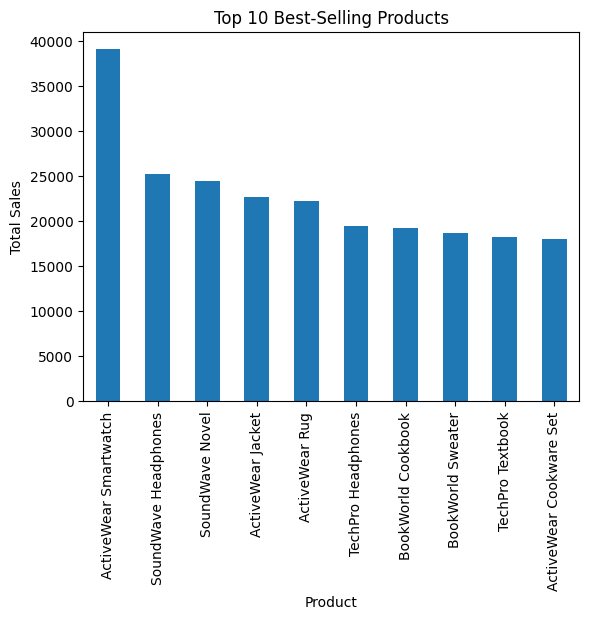

In [20]:
# Product Performance
product_sales = data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False)

# Top 10 products
product_sales.head(10).plot(kind="bar", title="Top 10 Best-Selling Products", xlabel="Product", ylabel="Total Sales")
plt.show()

### Top 10 most selling products

The Activewear Smartwatch leads the total sales by a significant margin, followed by SoundWave Headphones and SoundWave Novel. To gain an even simplified idea, let's look at category wise sales

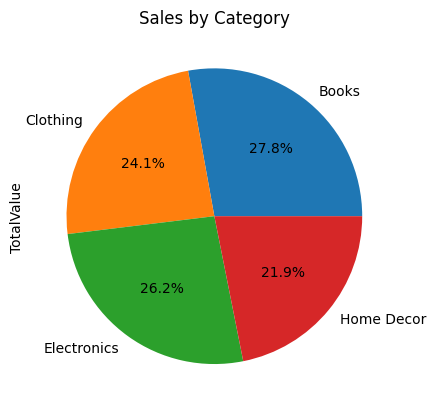

In [21]:
# Category wise sales
category_sales = data.groupby("Category")["TotalValue"].sum()

category_sales.plot(kind="pie", title="Sales by Category", autopct='%1.1f%%')
plt.show()

### Sales by Category:

1. Books lead with 27.8% of the total sales, suggesting they are the most purchased category.
2. Electronics follow closely with 26.2%, indicating a strong demand for gadgets and tech products.
3. Clothing contributes 24.1%, showing consistent customer interest in apparel.
4. Home Decor accounts for the smallest share at 21.9%.

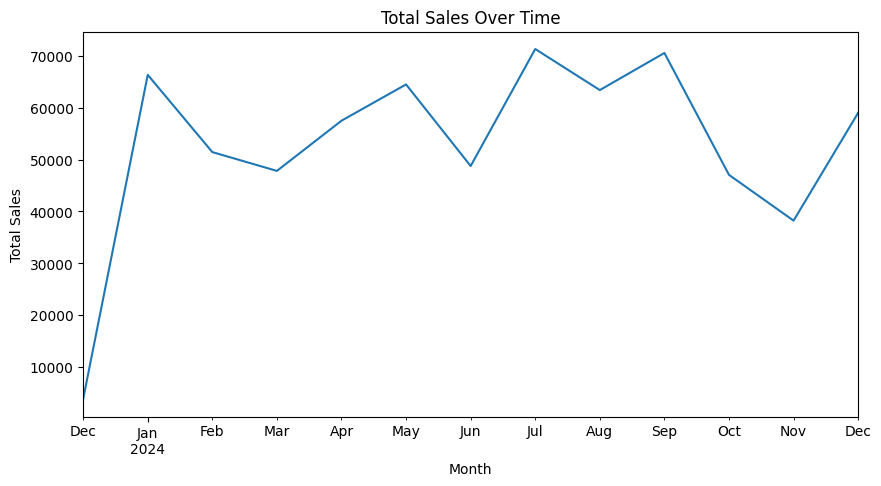

In [22]:
# Total Sales over time

data["TransactionDate"] = pd.to_datetime(data["TransactionDate"])
sales_over_time = data.groupby(data["TransactionDate"].dt.to_period("M"))["TotalValue"].sum()
sales_over_time.plot(title="Total Sales Over Time", xlabel="Month", ylabel="Total Sales", figsize=(10, 5))
plt.show()

### Sales over time

1. There is a trend of increasing sales from the start of the year (January) to the peak in July, followed by declining sales towards the end of the year.

2. The highest sales occur in July, reaching around 70,000 units.

3. The lowest sales occur in December, dropping to around 40,000 units. 

In [26]:
average_order_value = data["TotalValue"].mean()
print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Value: $690.00


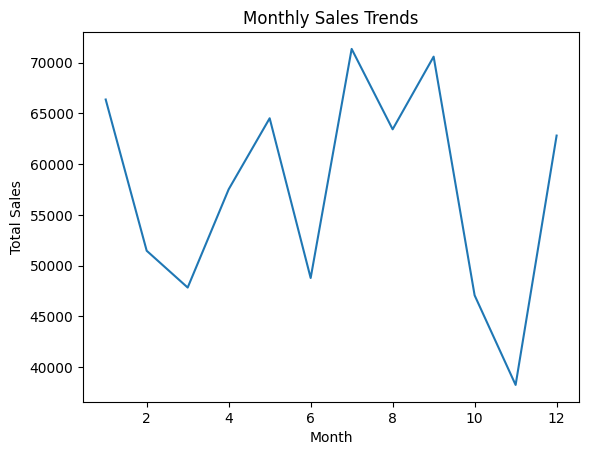

In [27]:
# Seasonal Trends (Analysis of Monthly sales)

data["Month"] = data["TransactionDate"].dt.month
monthly_sales = data.groupby("Month")["TotalValue"].sum()

monthly_sales.plot(title="Monthly Sales Trends", xlabel="Month", ylabel="Total Sales")
plt.show()

In [28]:
# Top 20% customers by revenue
customer_revenue = data.groupby("CustomerID")["TotalValue"].sum()
top_20_percent_revenue = customer_revenue.nlargest(int(len(customer_revenue) * 0.2))

print(f"High-Value Customers Contribution: {top_20_percent_revenue.sum() / customer_revenue.sum() * 100:.2f}%")


High-Value Customers Contribution: 35.14%


### Top 20% customers by revenue
The results indicate the following:
1. High-value customers (top 20% by revenue) account for a significant portion of total revenue at over 35%.
2. The remaining 80% of customers contribute less than 65% of total revenue.